<a href="https://colab.research.google.com/github/realBagher/Image_Processing_OpenCV/blob/main/Interpolations/Image_Interploations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMAGE INTERPOLATIONS
in this notebook we discover Limitations of the Knn , Bilinear and Bicubic Interpolations and Impelemnet them from scratch as well as thier open Cv alternatives 


1.   knn
2.   bilinear
3.   bicubic 



### Importing Dependencies 

In [159]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 
import PIL

### helper functions

In [6]:
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

## K-nearest neighbor Interpolation

In this approach we used the average value of the original neighbouring image pixels to generate new values for the corresponding pixel in the output image wheter we are increasing the scale or decreasing the scale of the image is irrelavent as the underlying logic remains the same

> Knn image interpolation : 
KNN (K-Nearest Neighbor) image interpolation is a method of resizing an image by using a KNN algorithm to estimate new pixel values based on the nearest neighbors in the original image.

In KNN interpolation, each pixel in the output image is assigned a new value based on the values of its K nearest neighbors in the input image. The value of K can be set to any integer value, but typically values of 3 or 4 are used.




To perform KNN interpolation, the algorithm first determines the distance between the target pixel and all the other pixels in the original image. The K nearest pixels are then identified, and their values are used to calculate the new value of the target pixel.

The KNN interpolation algorithm can be used for both upscaling and downscaling an image. For upscaling, new pixels are added to the image by estimating their values based on the K nearest neighbors of the original image. For downscaling, the algorithm selects a subset of pixels from the original image and interpolates their values to generate a smaller image.

One limitation of KNN interpolation is that it can result in jagged edges and pixelation in the output image, especially when used for significant upscaling. To mitigate this, more advanced interpolation methods such as bicubic interpolation or Lanczos resampling are often used which we will discuss further into this notebook

> Here are the steps that the algorithm take:

1. Define the scaling factor: Determine the scaling factor by 
which you want to resize the original image.

2. Determine the output image size: Calculate the dimensions of the output image based on the scaling factor and the dimensions of the original image.

3. Calculate the distance between pixels: For each pixel in the output image, calculate the distance between that pixel and every pixel in the original image.

4. Select the K nearest neighbors: Identify the K pixels in the original image that are closest to the pixel in the output image based on the distance calculated in step 3.

5. Interpolate the pixel value: Calculate the value of the pixel in the output image by averaging the values of the K nearest neighbors in the original image.

6. Repeat for all pixels: Repeat steps 3 to 5 for every pixel in the output image to generate the final resized image. 

In [2]:
image = cv2.imread('/content/chihuahua.jpg')

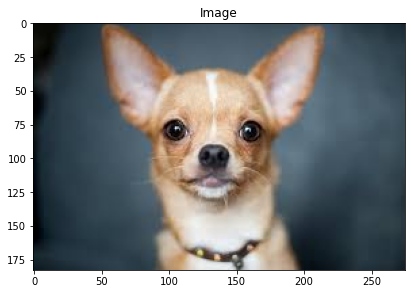

In [9]:
# sample image 
imshow(image=image)

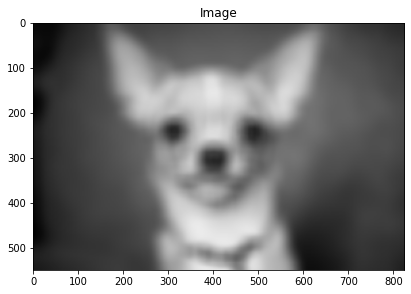

In [76]:

def knn_interpolation(image, k,scale):
    # Get dimensions of the input image
    height, width = image.shape[:2]

    # Create an output image with double the dimensions of the input image
    output = np.zeros((int(height*scale), int(width*scale)), dtype=image.dtype)

    # Loop over each pixel in the output image
    for y in range(output.shape[0]):
        for x in range(output.shape[1]):
            # Compute the corresponding location in the input image
            x_in = int(x/scale)
            y_in = int(y/scale)

            # Get the k nearest neighbors of the current pixel in the input image
            neighbors = image[max(0, y_in-k):min(height, y_in+k+1), max(0, x_in-k):min(width, x_in+k+1)]

            # Compute the value of the output pixel as the mean of the k nearest neighbors
            output[y, x] = np.mean(neighbors)

    return output

# Load an example image
image = cv2.imread("/content/chihuahua.jpg", cv2.IMREAD_GRAYSCALE)

# Apply k-nearest neighbor interpolation with k=1
output = knn_interpolation(image, 5,3)
imshow(image=output)

In [97]:
outputs_knn= []
for i in [3,2,0.3]: 
  for j in [3,4,7,10]:
    outputs_knn.append(knn_interpolation(image, j,i))



In [86]:
len(outputs_knn) , len(outputs_knn[0])

(3, 4)

In [ ]:
outputs_knn[]

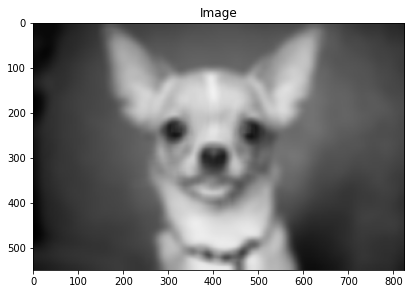

In [127]:
imshow(image=outputs_knn[0]) ## scale = 3 k =3

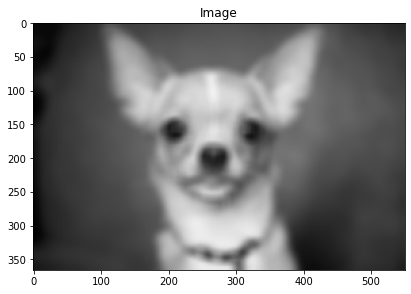

In [128]:
imshow(image=outputs_knn[4]) # scale = 2 k = 3

### Result of KNN interpolation :

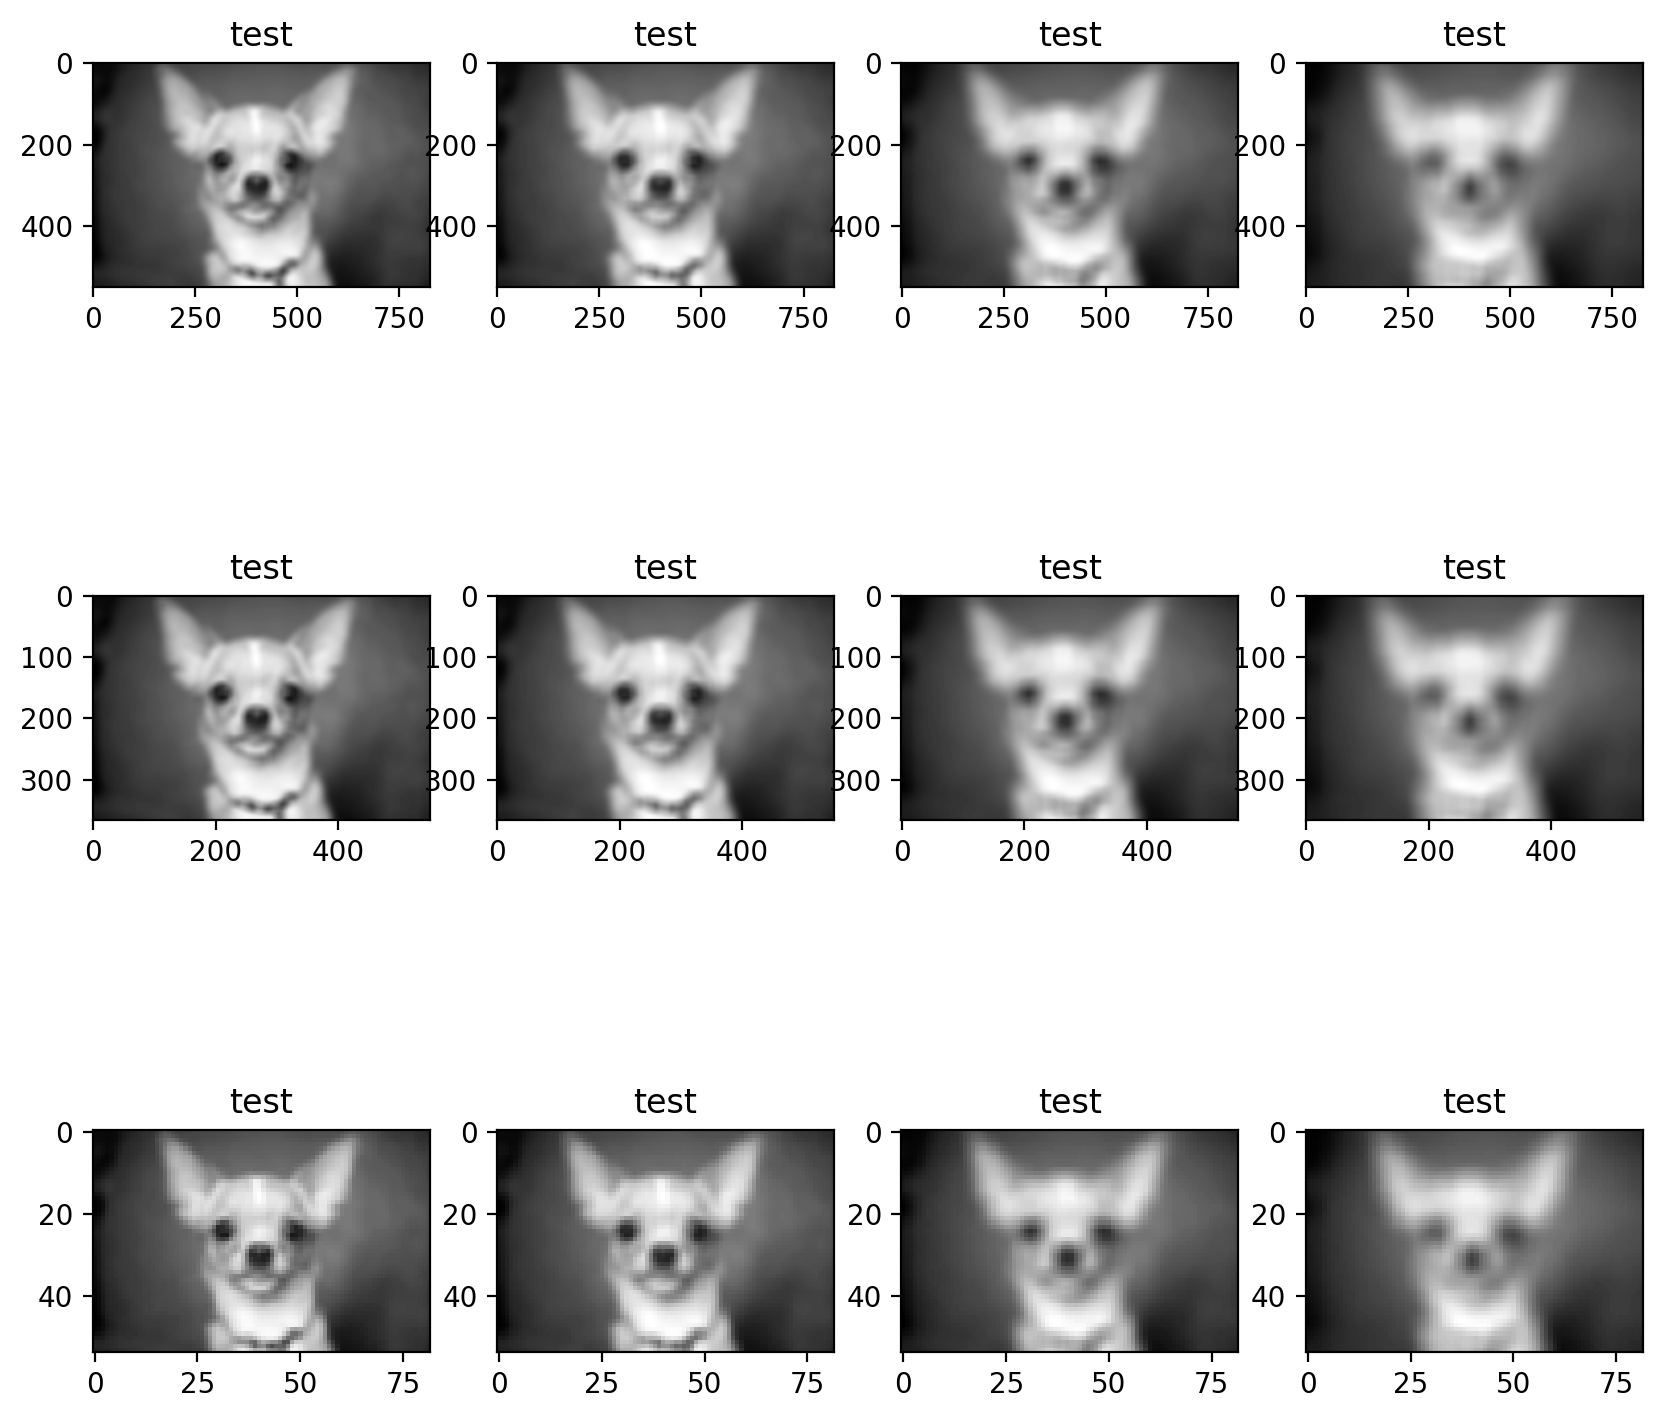

In [137]:
rows = 3

fig, axs = plt.subplots(3,4,figsize=(10, 10), dpi=200)
cols = [3,4,7,10]
row  = [3,2,0.3]




for i in range(len(outputs_knn)):
  for j in range(len(outputs_knn)):
    img = outputs_knn[i]
    plt.subplot(rows,4,i+1)
    plt.title('test')
    plt.axis('on')
    plt.imshow(img,cmap='gray')



as noticed by the above plot increasing the number of neighbors ie: K results in us losing details of the image as well as image sharpness 

the effect is obvious while traversing the images from left to right 

form top to bottom scale iterates on values 3 2 and 0.3 it is noticable that jaggedness of the picture increases

## Bilinear Interpolation 

**Bilinear interpolation is a method of estimating the value of a point within a grid of known values.**

The method involves using the values of the four closest known data points (usually in a square grid) to estimate the value at a new point. The process calculates a weighted average of the four surrounding points, with the weights determined by the distance between the new point and each of the surrounding points.

The formula for bilinear interpolation is:

$f(x,y) = (1 - u)(1 - v)f(x1,y1) + u(1 - v)f(x2,y1) + (1 - u)vf(x1,y2) + uvf(x2,y2)$

where:

* f(x,y) is the estimated value at the new point (x,y)
* f(x1,y1), f(x2,y1), f(x1,y2), and f(x2,y2) are the known values at the four closest points
* u and v are the distances between the new point and the closest points, as a proportion of the distance between the four closest points.

**Bilinear interpolation can produce smoother and more accurate results than other interpolation methods, especially when the known data points are closely spaced.**

In [138]:
# import cv2
# import numpy as np

def bilinear_interpolation(img, scale):
    height, width, channels = img.shape
    new_height = int(height * scale)
    new_width = int(width * scale)
    new_img = np.zeros((new_height, new_width, channels), dtype=np.uint8)

    for c in range(channels):
        for i in range(new_height):
            for j in range(new_width):
                x = j / scale
                y = i / scale
                x1 = int(x)
                x2 = x1 + 1
                y1 = int(y)
                y2 = y1 + 1

                if x2 >= width:
                    x2 = width - 1
                if y2 >= height:
                    y2 = height - 1

                f11 = img[y1, x1, c]
                f12 = img[y2, x1, c]
                f21 = img[y1, x2, c]
                f22 = img[y2, x2, c]

                dx = x - x1
                dy = y - y1

                f = (f11 * (1 - dx) * (1 - dy) +
                     f21 * dx * (1 - dy) +
                     f12 * (1 - dx) * dy +
                     f22 * dx * dy)

                new_img[i, j, c] = f

    return new_img


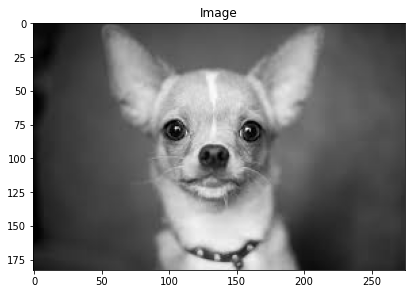

In [143]:
imshow(image=image)

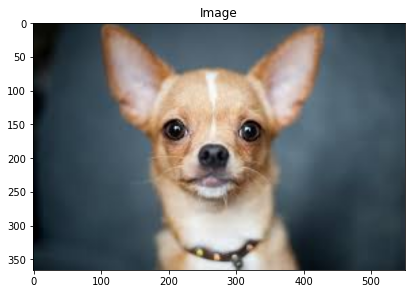

In [146]:
image = cv2.imread('/content/chihuahua.jpg')
imshow(image=bilinear_interpolation(image, 2))

In [149]:
outputs_bilinear = []
for i in  [3,2,0.3]:
  outputs_bilinear.append(bilinear_interpolation(image, i))

### Results of Bilinear Interpolation:

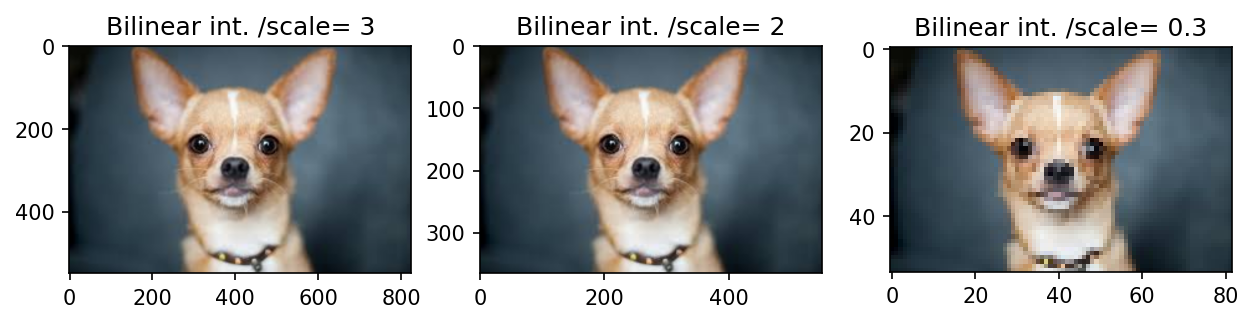

In [158]:
fig, axs = plt.subplots(1,3,figsize=(10, 10),dpi=150)
cols = [3,2,0.3]
for i, ax in enumerate(axs):
    ax.imshow(cv2.cvtColor(outputs_bilinear[i], cv2.COLOR_BGR2RGB))
    ax.set_title('Bilinear int. /scale= {}'.format(cols[i]))



> by the above plot we observe that reducing the scale to 0.3 causes image pixelation and jaggedness while increasing it by the factor of 3 casues it to lose the details crucial for retaining image sharpness 

**yet the improvement from knn interpolation is quite noticeable**

## Bicubic Interpolations:

Bicubic image interpolation is a method of estimating the value of a point within an image using a cubic polynomial function. It is a higher-order extension of bilinear interpolation, which uses a linear function instead of a cubic polynomial.

The method involves using the values of the 16 closest known data points (usually in a 4x4 grid) to estimate the value at a new point. The process calculates a weighted average of these 16 points, with the weights determined by the distance between the new point and each of the surrounding points.

The formula for bicubic interpolation is:

**$f(x,y) = ∑_{i=0}^3 ∑_{j=0}^3   a_ij * x_i^j * y_j^i$**

where:

* f(x,y) is the estimated value at the new point (x,y)
* xi and yj are the distances between the new point and the closest points in the 4x4 grid, normalized to be between -1 and 1
* aij are the coefficients of the cubic polynomial function, which are determined using the values of the 16 closest points and their partial derivatives.

**Bicubic interpolation can produce smoother and more accurate results than bilinear interpolation, especially when the known data points are sparsely distributed. However, it can also be more computationally intensive and may be slower than bilinear interpolation.**

In [163]:
import cv2
import numpy as np
from scipy.interpolate import interp2d

def bicubic_interpolation(img, scale):
    height, width, channels = img.shape
    new_height = int(height * scale)
    new_width = int(width * scale)
    new_img = np.zeros((new_height, new_width, channels), dtype=np.uint8)

    # Create row and column indices for new image
    row_indices = np.arange(0, new_height, 1) / scale
    col_indices = np.arange(0, new_width, 1) / scale

    for c in range(channels):
        # Create 2D interpolation function for each color channel
        interp_func = interp2d(np.arange(0, width, 1), np.arange(0, height, 1), img[:, :, c], kind='cubic')

        # Interpolate new image
        new_channel = interp_func(col_indices, row_indices)
        new_channel = np.clip(new_channel, 0, 255)

        # Assign interpolated channel to new image
        new_img[:, :, c] = new_channel.astype(np.uint8)

    return new_img


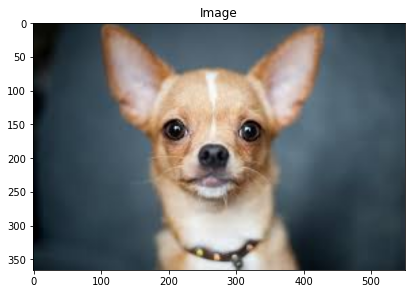

In [161]:
image = cv2.imread('/content/chihuahua.jpg')
imshow(image=bilinear_interpolation(image, 2))

<ipython-input-163-a69d76059940>:17: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  interp_func = interp2d(np.arange(0, width, 1), np.arange(0, height, 1), img[:, :, c], kind='cubic')
<ipython-input-163-a69d76059940>:20: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
        scattered 2

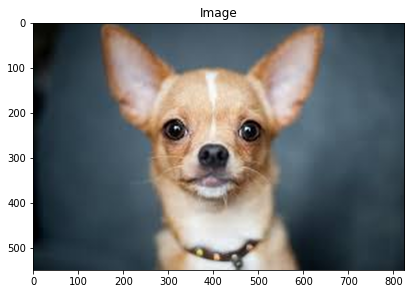

In [167]:
imshow(image=bicubic_interpolation(image, 3));

In [168]:
outputs_bicubic = []
for i in  [3,2,0.3]:
  outputs_bicubic.append(bilinear_interpolation(image, i))

### Bicubic Interpolation Results:

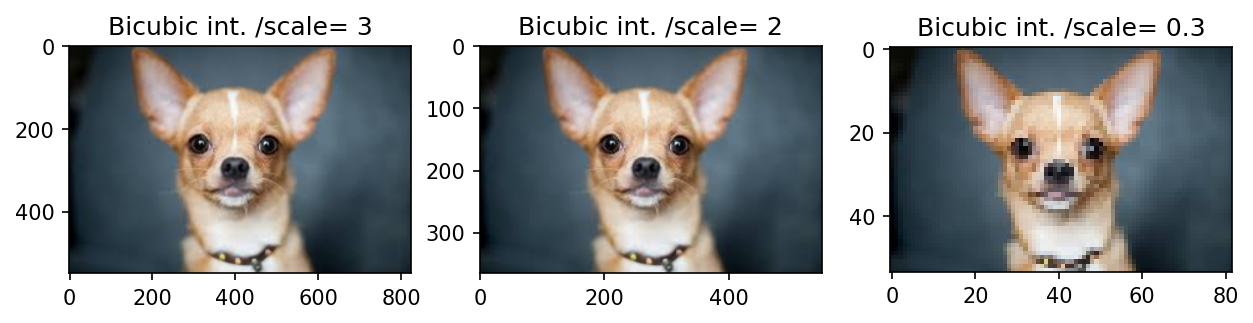

In [170]:
fig, axs = plt.subplots(1,3,figsize=(10, 10),dpi=150)
cols = [3,2,0.3]
for i, ax in enumerate(axs):
    ax.imshow(cv2.cvtColor(outputs_bicubic[i], cv2.COLOR_BGR2RGB))
    ax.set_title('Bicubic int. /scale= {}'.format(cols[i]))


as discussed earlier while computationally more expensive bicubic interpolation is significantly better than the two previous approaches; yet we eprience jaggedness and pixalation in 0.3 scale which is directly result of lost image details 

**However the smoothness of 3 scale is remarkable**